<a href="https://colab.research.google.com/github/sath-27/NYC-Taxi-Trip-Pred/blob/main/Trip_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [82]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

df['store_and_fwd_flag'] = 1*(df.store_and_fwd_flag.values == 'Y')

In [83]:
log_y = np.log(df['trip_duration'].values)

df.loc[: , 'pickup_weekday'] = df['pickup_datetime'].dt.weekday
df.loc[:, 'pickup_weekofyear'] = df['pickup_datetime'].dt.weekofyear
df.loc[:, 'pickup_hour'] = df['pickup_datetime'].dt.hour
df.loc[:, 'pickup_minute'] = df['pickup_datetime'].dt.minute
df.loc[:, 'pickup_week_hour'] = df['pickup_weekday'] * 24 + df['pickup_hour']

df.head()



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_weekofyear,pickup_hour,pickup_minute,pickup_week_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,9,16,40,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,10,23,35,119
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,7,17,59,161
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,1,9,44,33
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,7,6,42,54


In [84]:
y_dist = df['pickup_longitude'] - df['dropoff_longitude']
x_dist = df['pickup_latitude'] - df['dropoff_latitude']

dist_sqr = (y_dist ** 2) + (x_dist ** 2)
df['eucledian_dist'] = dist_sqr ** 0.5
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_weekofyear,pickup_hour,pickup_minute,pickup_week_hour,eucledian_dist
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,9,16,40,16,0.012592
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,10,23,35,119,0.037371
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,7,17,59,161,0.072712
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,1,9,44,33,0.021473
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,7,6,42,54,0.043264


Haversine Distance


Let's calculate the distance (km) between pickup and dropoff points. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. We will also calculate the approximate angle at which the dropoff location lies wrt the pickup location. pd.DataFrame.apply() would be too slow so the haversine function is rewritten to handle arrays.

Haversine direction represents the information of angle of the line connecting the dropoff and pickup point over the surface of earth wrt equator

In [85]:
def haversine_array(lat1,lon1,lat2,lon2):
  lat1,lon1,lat2,lon2 = map(np.radians, (lat1,lon1,lat2,lon2))
  lat = lat2-lat1
  lon = lon2-lon1
  d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon * 0.5) ** 2
  h = 2 * 6400 * np.arcsin(np.sqrt(d))
  return h

def direction_array(lat1, lon1, lat2, lon2):
    lon_delta_rad = np.radians(lon2 - lon1)
    lat1, lon1, lat2, lon2 = map(np.radians, (lat1, lon1, lat2, lon2))
    y = np.sin(lon_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lon_delta_rad)
    return np.degrees(np.arctan2(y, x))

df['haversine_distance'] = haversine_array(df['pickup_latitude'].values, 
                                                     df['pickup_longitude'].values, 
                                                     df['dropoff_latitude'].values, 
                                                     df['dropoff_longitude'].values)


df['direction'] = direction_array(df['pickup_latitude'].values, 
                                          df['pickup_longitude'].values, 
                                          df['dropoff_latitude'].values, 
                                          df['dropoff_longitude'].values)

#df.head()


In [86]:
df['pickup_latitude'] = np.round(df['pickup_latitude'],3)
df['pickup_longitude'] = np.round(df['pickup_longitude'],3)

df['dropoff_latitude'] = np.round(df['dropoff_latitude'],3)
df['dropoff_longitude'] = np.round(df['dropoff_longitude'],3)

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_weekofyear,pickup_hour,pickup_minute,pickup_week_hour,eucledian_dist,haversine_distance,direction
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.954,40.779,-73.964,40.771,0,400,0,9,16,40,16,0.012592,1.204531,-135.634530
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988,40.732,-73.995,40.695,0,1100,4,10,23,35,119,0.037371,4.147906,-172.445217
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997,40.721,-73.948,40.775,0,1635,6,7,17,59,161,0.072712,7.283757,34.916093
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.962,40.760,-73.957,40.781,0,1141,1,1,9,44,33,0.021473,2.371845,10.043567
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017,40.708,-73.988,40.741,0,848,2,7,6,42,54,0.043264,4.348237,34.280582


In [87]:
df = df.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration','store_and_fwd_flag'], axis=1)

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(df,log_y,test_size=0.3, random_state=0)

In [89]:
mean_pred = np.repeat(ytrain.mean(), len(ytest))
sqrt(mean_squared_error(ytest,mean_pred))

0.8028812620190939

**Cross validation**

Cross Validation is one of the most important concepts in any type of data modelling. It simply says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model.

We divide the entire population into k equal samples. Now we train models on k-1 samples and validate on 1 sample. Then, at the second iteration we train the model with a different sample held as validation.

In k iterations, we have basically built model on each sample and held each of them as validation. This is a way to reduce the selection bias and reduce the variance in prediction power

In [90]:
def cv_score(ml_model, rstate = 11,cols = df.columns):
    i = 1
    cv_scores = []
    df1 = df.copy()
    df1 = df[cols]
    
    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    for train_index,test_index in kf.split(df1,log_y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[train_index],df1.loc[test_index]
        ytr,yvl = log_y[train_index],log_y[test_index]

        model = ml_model
        model.fit(xtr, ytr)
        train_val = model.predict(xtr)
        pred_val = model.predict(xvl)
        rmse_score_train = sqrt(mean_squared_error(ytr, train_val))
        rmse_score = sqrt(mean_squared_error(yvl, pred_val))
        sufix = ""
        msg = ""
        #msg += "Train RMSE: {:.5f} ".format(rmse_score_train)
        msg += "Valid RMSE: {:.5f}".format(rmse_score)
        print("{}".format(msg))
        # Save scores
        cv_scores.append(rmse_score)
        i+=1
    return cv_scores

In [91]:
linreg_scores = cv_score(LinearRegression())


1 of kfold 5
Valid RMSE: 0.63981

2 of kfold 5
Valid RMSE: 0.63957

3 of kfold 5
Valid RMSE: 0.80895

4 of kfold 5
Valid RMSE: 0.64844

5 of kfold 5
Valid RMSE: 0.64634


In [92]:
dtree_scores = cv_score(DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25))


1 of kfold 5
Valid RMSE: 0.43744

2 of kfold 5
Valid RMSE: 0.44061

3 of kfold 5
Valid RMSE: 0.43065

4 of kfold 5
Valid RMSE: 0.43305

5 of kfold 5
Valid RMSE: 0.43463


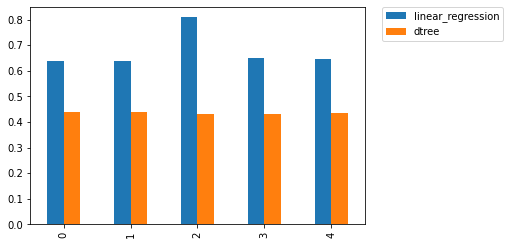

In [93]:
results_df = pd.DataFrame({'linear_regression':linreg_scores, 'dtree': dtree_scores})
results_df.plot(y=["linear_regression", "dtree"], kind="bar", legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Exporting the tree distribution

In [94]:
from sklearn import tree


In [95]:
dtree = DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25)
dtree.fit(xtrain, ytrain)

DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25)

In [98]:
decision_tree = tree.export_graphviz(dtree,out_file='dude.dot',feature_names=xtrain.columns,max_depth=2,filled=True)
!dot -Tpng dude.dot -o trees.png